In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, detrend

In [2]:
df = pd.read_csv('tasmir_10_100_with_shifted_signal.csv')  # Replace with your actual file
ppg_signal = df['ShiftedSignal'].values

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


In [4]:

# Parameters for the low-pass filter
cutoff = 2.5  # Cutoff frequency in Hz
fs = 100.0  # Sampling frequency in Hz
order = 4  # Filter order

ppg_denoised = butter_lowpass_filter(ppg_signal, cutoff, fs, order)


In [6]:
ppg_detrended = detrend(ppg_denoised)

In [7]:
ppg_normalized = (ppg_detrended - np.min(ppg_detrended)) / (np.max(ppg_detrended) - np.min(ppg_detrended))

In [8]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='valid')

# Parameters for the moving average
window_size = 5

ppg_smoothed = moving_average(ppg_normalized, window_size)


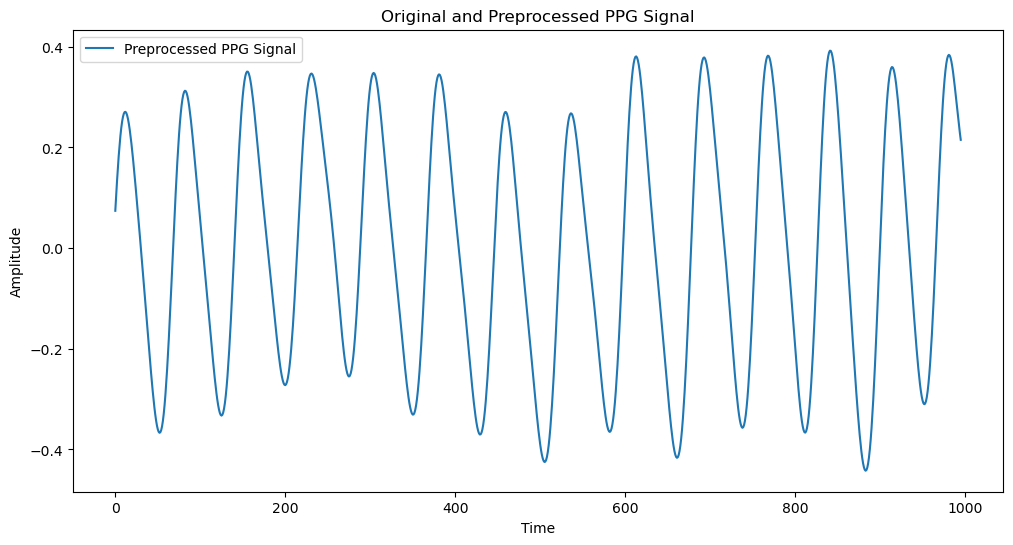

In [22]:
plt.figure(figsize=(12, 6))
# plt.plot(ppg_signal, label='Original PPG Signal')
plt.plot(ppg_smoothed, label='Preprocessed PPG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original and Preprocessed PPG Signal')
plt.legend()
plt.show()


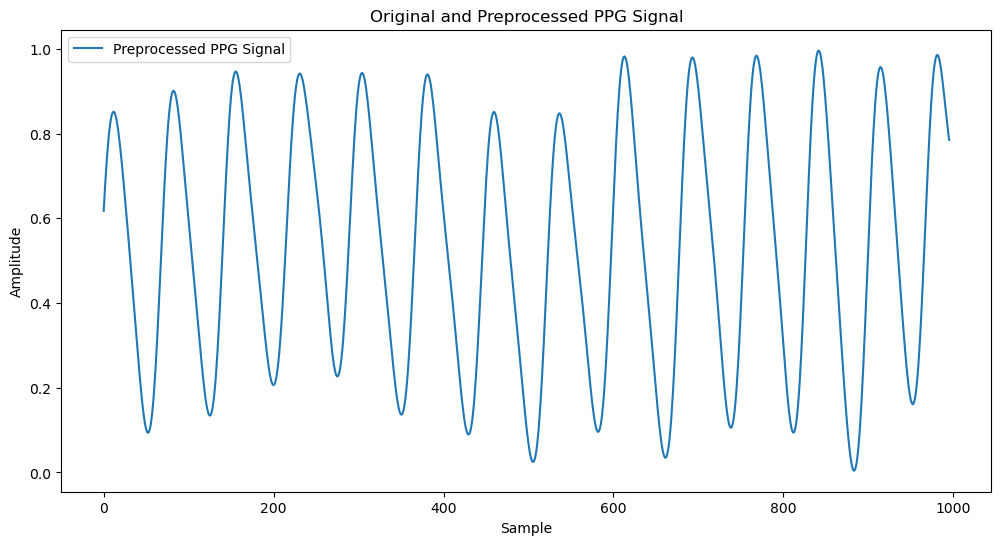

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, detrend

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='valid')

# Load the PPG signal from CSV
df = pd.read_csv('tasmir_10_100_with_shifted_signal.csv')  # Replace with your actual file
ppg_signal = df['ShiftedSignal'].values[:1000]

# Parameters for the filters
cutoff = 2.5  # Low-pass filter cutoff frequency in Hz
fs = 100.0  # Sampling frequency in Hz
order = 4  # Low-pass filter order
window_size = 5  # Moving average window size

# Preprocess the PPG signal
ppg_denoised = butter_lowpass_filter(ppg_signal, cutoff, fs, order)
ppg_detrended = detrend(ppg_denoised)
ppg_normalized = (ppg_detrended - np.min(ppg_detrended)) / (np.max(ppg_detrended) - np.min(ppg_detrended))
ppg_smoothed = moving_average(ppg_normalized, window_size)

# Plot the original and preprocessed PPG signal
plt.figure(figsize=(12, 6))
# plt.plot(ppg_signal, label='Original PPG Signal')
plt.plot(range(len(ppg_smoothed)), ppg_smoothed, label='Preprocessed PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original and Preprocessed PPG Signal')
plt.legend()
plt.show()


Original PPG Signal: [37296.60439028 41982.6889152  46503.82098855 50701.99780574
 54422.2166047  57562.47466546 60020.76930986 61761.09790119
 62551.45784379 62558.84658278]
Z-score Normalized PPG Signal: [0.27302868 0.55174724 0.82065477 1.0703536  1.29162447 1.47840049
 1.62461474 1.72812586 1.77513483 1.7755743 ]


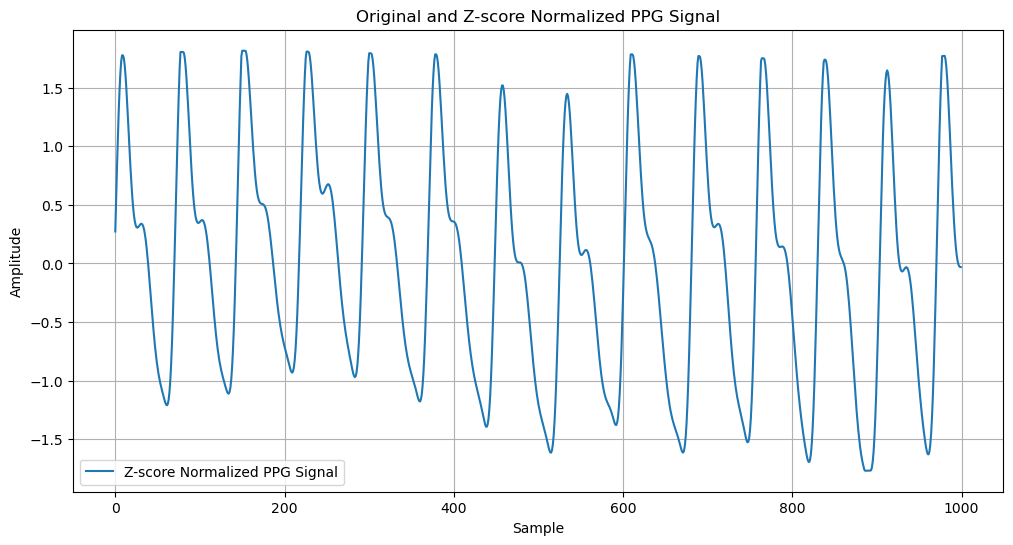

In [24]:
# Load the PPG signal from CSV
df = pd.read_csv('tasmir_10_100_with_shifted_signal.csv')  # Replace with your actual file
ppg_signal = df['ShiftedSignal'].values[:1000]

# Ensure that the signal is loaded correctly
print("Original PPG Signal:", ppg_signal[:10])  # Print the first 10 values for verification

# Z-score normalization function
def z_score_normalize(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    normalized_signal = (signal - mean) / std
    return normalized_signal

# Apply Z-score normalization to the PPG signal
ppg_signal_zscore_normalized = z_score_normalize(ppg_signal)

# Ensure that the normalization is done correctly
print("Z-score Normalized PPG Signal:", ppg_signal_zscore_normalized[:10])  # Print the first 10 values for verification

# Plot the original and Z-score normalized PPG signals
plt.figure(figsize=(12, 6))
# plt.plot(ppg_signal, label='Original PPG Signal')
plt.plot(ppg_signal_zscore_normalized, label='Z-score Normalized PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original and Z-score Normalized PPG Signal')
plt.legend()
plt.grid(True)
plt.show()

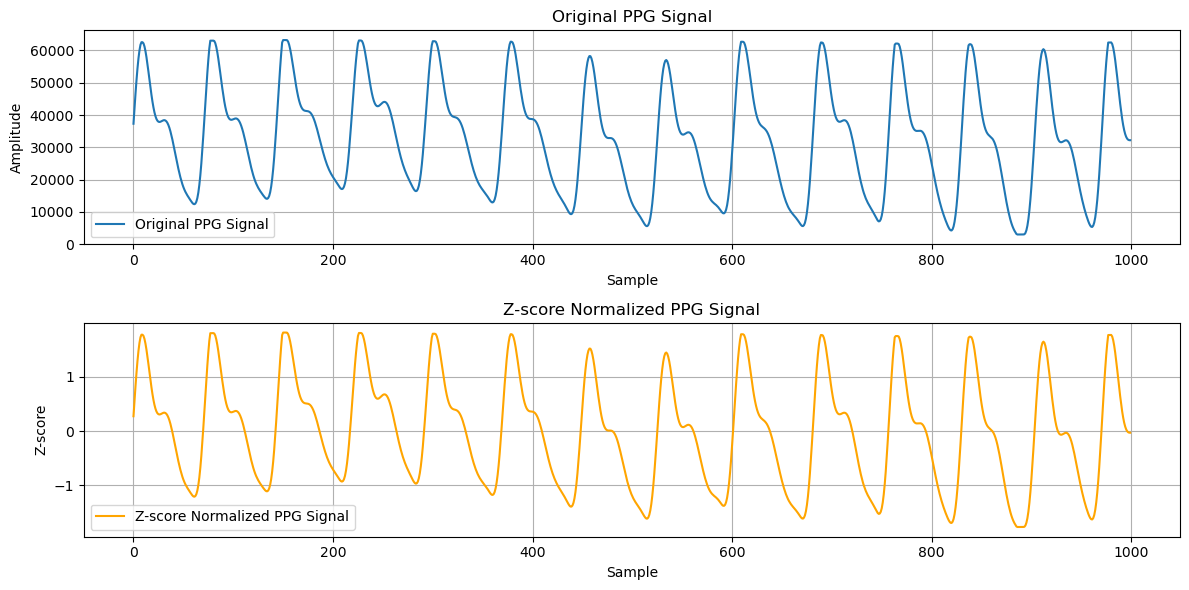

In [20]:
# Z-score normalization function
def z_score_normalize(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    normalized_signal = (signal - mean) / std
    return normalized_signal

# Apply Z-score normalization to the PPG signal
ppg_signal_zscore_normalized = z_score_normalize(ppg_signal)

# Plot the original and Z-score normalized PPG signals
plt.figure(figsize=(12, 6))

# Plot original PPG signal
plt.subplot(2, 1, 1)
plt.plot(ppg_signal, label='Original PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original PPG Signal')
plt.legend()
plt.grid(True)

# Plot Z-score normalized PPG signal
plt.subplot(2, 1, 2)
plt.plot(ppg_signal_zscore_normalized, label='Z-score Normalized PPG Signal', color='orange')
plt.xlabel('Sample')
plt.ylabel('Z-score')
plt.title('Z-score Normalized PPG Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

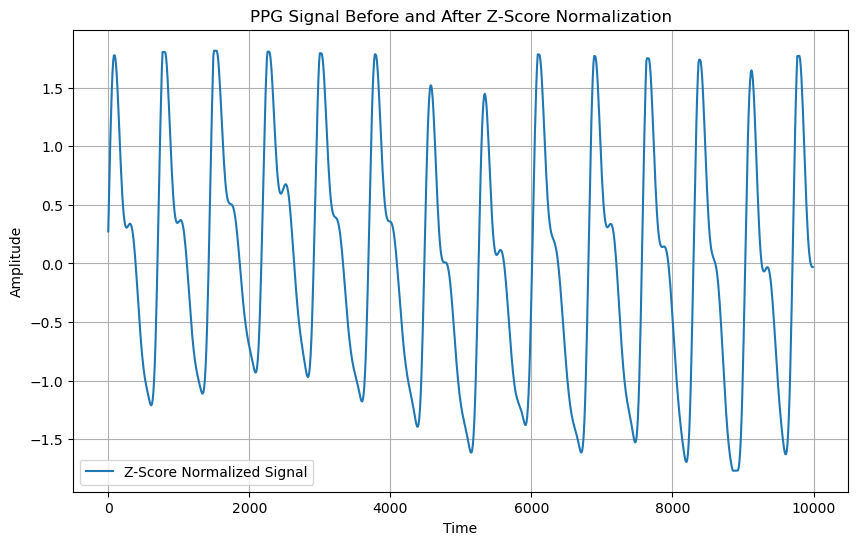

In [21]:
data = pd.read_csv('tasmir_10_100_with_shifted_signal.csv')

# Extract time and amplitude data (assuming column names)
time = data["Time"].values[:1000] # Replace with the actual time column name
amplitude = data["ShiftedSignal"].values[:1000]  # Replace with the actual amplitude column name

# Calculate mean and standard deviation of the amplitude data
mean_amplitude = np.mean(amplitude)
std_deviation = np.std(amplitude)

# Perform Z-score normalization
normalized_amplitude = (amplitude - mean_amplitude) / std_deviation

# Plot original and normalized signals
plt.figure(figsize=(10, 6))
# plt.plot(time, amplitude, label='Original Signal')
plt.plot(time, normalized_amplitude, label='Z-Score Normalized Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('PPG Signal Before and After Z-Score Normalization')
plt.legend()
plt.grid(True)
plt.show()

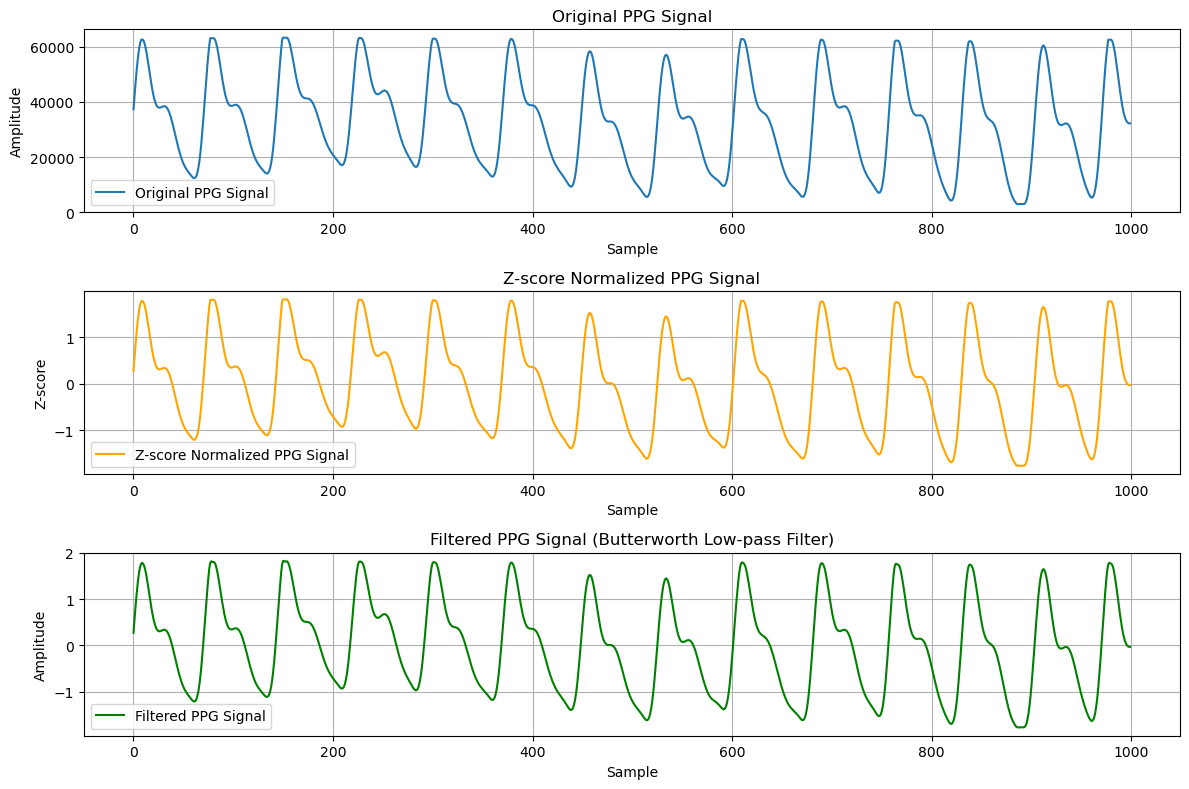

In [25]:
# Butterworth low-pass filter function
def butter_lowpass_filter(data, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the Butterworth filter
cutoff = 25.0  # Cutoff frequency in Hz
fs = 100.0  # Sampling frequency in Hz (you might need to adjust this based on your data)
order = 6  # Filter order

# Apply the Butterworth low-pass filter to the normalized PPG signal
ppg_signal_filtered = butter_lowpass_filter(ppg_signal_zscore_normalized, cutoff, fs, order)

# Plot the original, Z-score normalized, and filtered PPG signals
plt.figure(figsize=(12, 8))

# Plot original PPG signal
plt.subplot(3, 1, 1)
plt.plot(ppg_signal, label='Original PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original PPG Signal')
plt.legend()
plt.grid(True)

# Plot Z-score normalized PPG signal
plt.subplot(3, 1, 2)
plt.plot(ppg_signal_zscore_normalized, label='Z-score Normalized PPG Signal', color='orange')
plt.xlabel('Sample')
plt.ylabel('Z-score')
plt.title('Z-score Normalized PPG Signal')
plt.legend()
plt.grid(True)

# Plot filtered PPG signal
plt.subplot(3, 1, 3)
plt.plot(ppg_signal_filtered, label='Filtered PPG Signal', color='green')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered PPG Signal (Butterworth Low-pass Filter)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

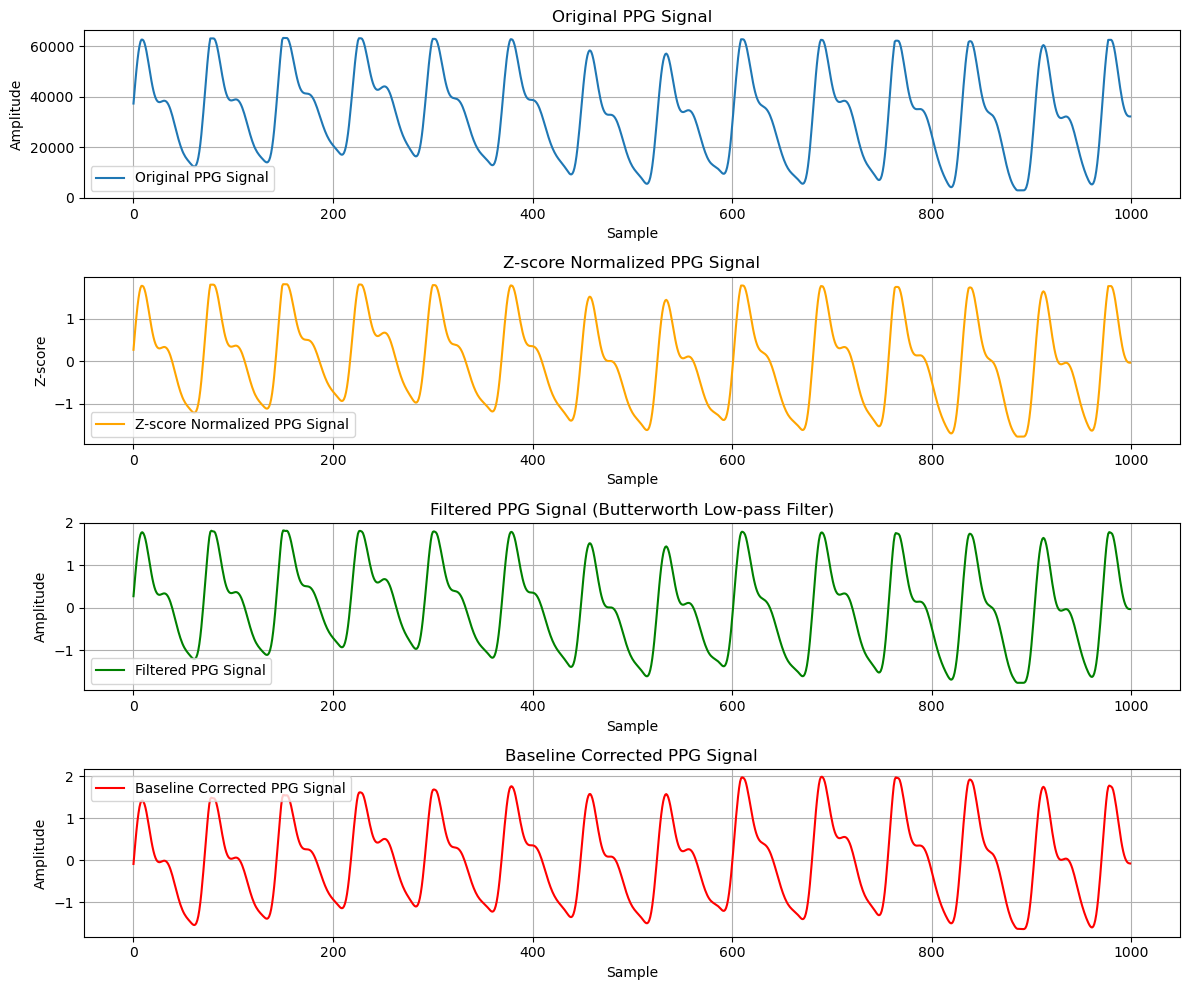

In [26]:
# Polynomial baseline correction function
def baseline_correction(signal, degree=3):
    x = np.arange(len(signal))
    poly_coeffs = np.polyfit(x, signal, degree)
    baseline = np.polyval(poly_coeffs, x)
    corrected_signal = signal - baseline
    return corrected_signal

# Apply polynomial baseline correction to the filtered PPG signal
ppg_signal_corrected = baseline_correction(ppg_signal_filtered)

# Plot the original, Z-score normalized, filtered, and baseline corrected PPG signals
plt.figure(figsize=(12, 10))

# Plot original PPG signal
plt.subplot(4, 1, 1)
plt.plot(ppg_signal, label='Original PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original PPG Signal')
plt.legend()
plt.grid(True)

# Plot Z-score normalized PPG signal
plt.subplot(4, 1, 2)
plt.plot(ppg_signal_zscore_normalized, label='Z-score Normalized PPG Signal', color='orange')
plt.xlabel('Sample')
plt.ylabel('Z-score')
plt.title('Z-score Normalized PPG Signal')
plt.legend()
plt.grid(True)

# Plot filtered PPG signal
plt.subplot(4, 1, 3)
plt.plot(ppg_signal_filtered, label='Filtered PPG Signal', color='green')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered PPG Signal (Butterworth Low-pass Filter)')
plt.legend()
plt.grid(True)

# Plot baseline corrected PPG signal
plt.subplot(4, 1, 4)
plt.plot(ppg_signal_corrected, label='Baseline Corrected PPG Signal', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Baseline Corrected PPG Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

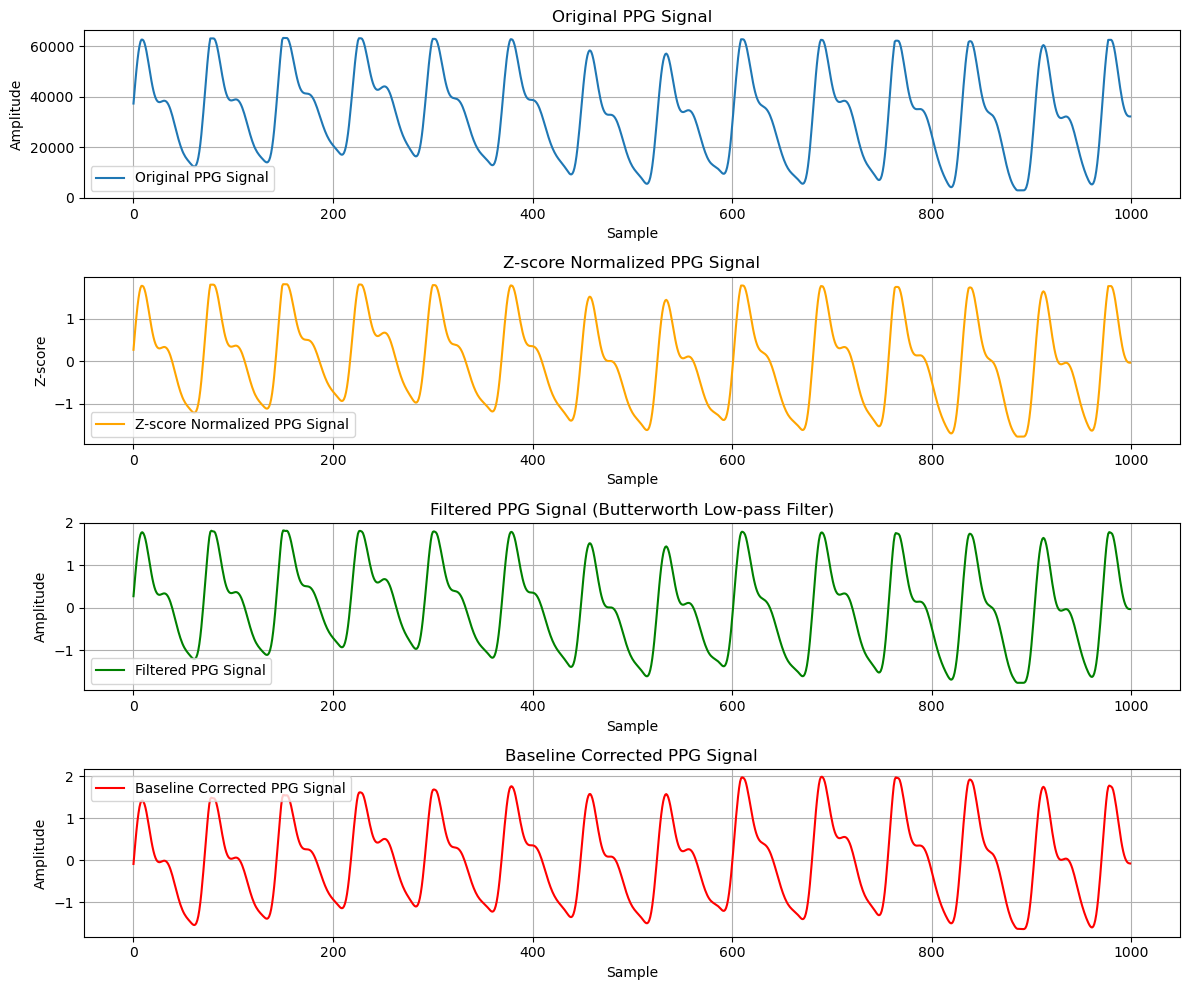

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the PPG signal from CSV
df = pd.read_csv('updated_ppg_signals.csv')  # Replace with your actual file
ppg_signal = df['ShiftedSignal'].values[:1000]

# Z-score normalization function
def z_score_normalize(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    normalized_signal = (signal - mean) / std
    return normalized_signal

# Apply Z-score normalization to the PPG signal
ppg_signal_zscore_normalized = z_score_normalize(ppg_signal)

# Butterworth low-pass filter function
def butter_lowpass_filter(data, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the Butterworth filter
cutoff = 25.0  # Cutoff frequency in Hz
fs = 100.0  # Sampling frequency in Hz (you might need to adjust this based on your data)
order = 6  # Filter order

# Apply the Butterworth low-pass filter to the normalized PPG signal
ppg_signal_filtered = butter_lowpass_filter(ppg_signal_zscore_normalized, cutoff, fs, order)

# Polynomial baseline correction function
def baseline_correction(signal, degree=3):
    x = np.arange(len(signal))
    poly_coeffs = np.polyfit(x, signal, degree)
    baseline = np.polyval(poly_coeffs, x)
    corrected_signal = signal - baseline
    return corrected_signal

# Apply polynomial baseline correction to the filtered PPG signal
ppg_signal_corrected = baseline_correction(ppg_signal_filtered)

# Add the corrected PPG signal as a new column to the dataframe
df['PPG'] = np.nan  # Initialize the column with NaN values
df.loc[:999, 'PPG'] = ppg_signal_corrected  # Assign the corrected signal to the first 1000 rows

# Save the updated dataframe to a new CSV file
df.to_csv('updated_ppg_signals.csv', index=False)

# Plot the original, Z-score normalized, filtered, and baseline corrected PPG signals
plt.figure(figsize=(12, 10))

# Plot original PPG signal
plt.subplot(4, 1, 1)
plt.plot(ppg_signal, label='Original PPG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original PPG Signal')
plt.legend()
plt.grid(True)

# Plot Z-score normalized PPG signal
plt.subplot(4, 1, 2)
plt.plot(ppg_signal_zscore_normalized, label='Z-score Normalized PPG Signal', color='orange')
plt.xlabel('Sample')
plt.ylabel('Z-score')
plt.title('Z-score Normalized PPG Signal')
plt.legend()
plt.grid(True)

# Plot filtered PPG signal
plt.subplot(4, 1, 3)
plt.plot(ppg_signal_filtered, label='Filtered PPG Signal', color='green')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Filtered PPG Signal (Butterworth Low-pass Filter)')
plt.legend()
plt.grid(True)

# Plot baseline corrected PPG signal
plt.subplot(4, 1, 4)
plt.plot(ppg_signal_corrected, label='Baseline Corrected PPG Signal', color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Baseline Corrected PPG Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

# Step 1: Read the CSV file
csv_file_path = "updated_ppg_signals.csv"
df = pd.read_csv(csv_file_path)

# Assuming the PPG signal is stored in a column named 'ppg_signal'
ppg_signal = df['PPG'].values

# Step 2: Find peaks (maxima) and valleys (minima) in the PPG signal
peaks_idx = argrelextrema(ppg_signal, np.greater)[0]  # Find peaks
valleys_idx = argrelextrema(ppg_signal, np.less)[0]   # Find valleys

# Step 3: Extract amplitudes of peaks and valleys
peaks_amplitudes = ppg_signal[peaks_idx]
valleys_amplitudes = ppg_signal[valleys_idx]

# Step 4: Filter peaks and valleys based on amplitude range 30000 to 50000
peaks_within_range_idx = peaks_idx[(peaks_amplitudes >= 0) & (peaks_amplitudes <= 1)]
valleys_within_range_idx = valleys_idx[(valleys_amplitudes >= 0) & (valleys_amplitudes <= 1)]

# Step 5: Get the number of peaks and valleys within the specified range
num_peaks_within_range = len(peaks_within_range_idx)
num_valleys_within_range = len(valleys_within_range_idx)

# Step 6: Output the number of peaks and valleys within the specified range
print("Number of peaks ", num_peaks_within_range)
print("Number of valleys ", num_valleys_within_range)

Number of peaks  7
Number of valleys  7
